<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [31]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

sns.set(style='darkgrid')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [32]:

rows =[]
with open('sat_scores.csv', 'r') as sat_file:
    csv_reader = csv.reader(sat_file, delimiter=',')
    header = next(csv_reader)
    for row in csv_reader:
        rows.append(row)
header
# rows

['State', 'Rate', 'Verbal', 'Math']

In [33]:
sat_dict = {'state':['state_list'], 'rate':['rate_list'], 'verbal':['verbal_list'], 'math': ['math_list']}


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [34]:
df_sat_dict = pd.DataFrame(sat_dict)
df_sat_dict.head()

,state,rate,verbal,math
0,state_list,rate_list,verbal_list,math_list


In [35]:
# sat_dict = pd.DataFrame(sat_dict)
df_sat_dict.dtypes


state     object
rate      object
verbal    object
math      object
dtype: object

Comment: The datatypes for rate, verbal and maths are calssed as strings

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [36]:
df_sat = pd.read_csv('sat_scores.csv')
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [37]:
df_sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [38]:
df_sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


Comment: The data is describing the SAT test score of students in 50 states in the US and the District of Columbia. However, our data has 52 rows of record. Needs further investigation. Unsure of what 'All' reprsents. It could be some aggregrate of sorts, so will drop to avoid skewing the data.

In [39]:
df_sat.drop(index=51, inplace=True)

In [40]:
df_sat.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [41]:
df_sat.shape

(51, 4)

In [42]:
df_sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [43]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Rate    51 non-null     int64 
 2   Verbal  51 non-null     int64 
 3   Math    51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [44]:
data_dict = pd.DataFrame(columns=['Column_label', 'Data_type', 'Description', 'No_of_states'])

In [45]:
data_dict['Column_label'] = df_sat.columns 

In [46]:
data_dict['Data_type'] = list(df_sat.dtypes)

In [47]:
data_dict['Description'] = ['Aggregrate SAT score of US States', 'Participation rate of students that took the SAT', 'Mean verbal score', 'Mean math score']

In [48]:
data_dict['No_of_states'] = [df_sat.shape[0] for v in data_dict['Column_label']]

In [49]:
data_dict

,Column_label,Data_type,Description,No_of_states
0,State,object,Aggregrate SAT score of US States,51
1,Rate,int64,Participation rate of students that took the SAT,51
2,Verbal,int64,Mean verbal score,51
3,Math,int64,Mean math score,51


In [50]:
data_dict.dtypes

Column_label    object
Data_type       object
Description     object
No_of_states     int64
dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/christineezeogu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Math'>

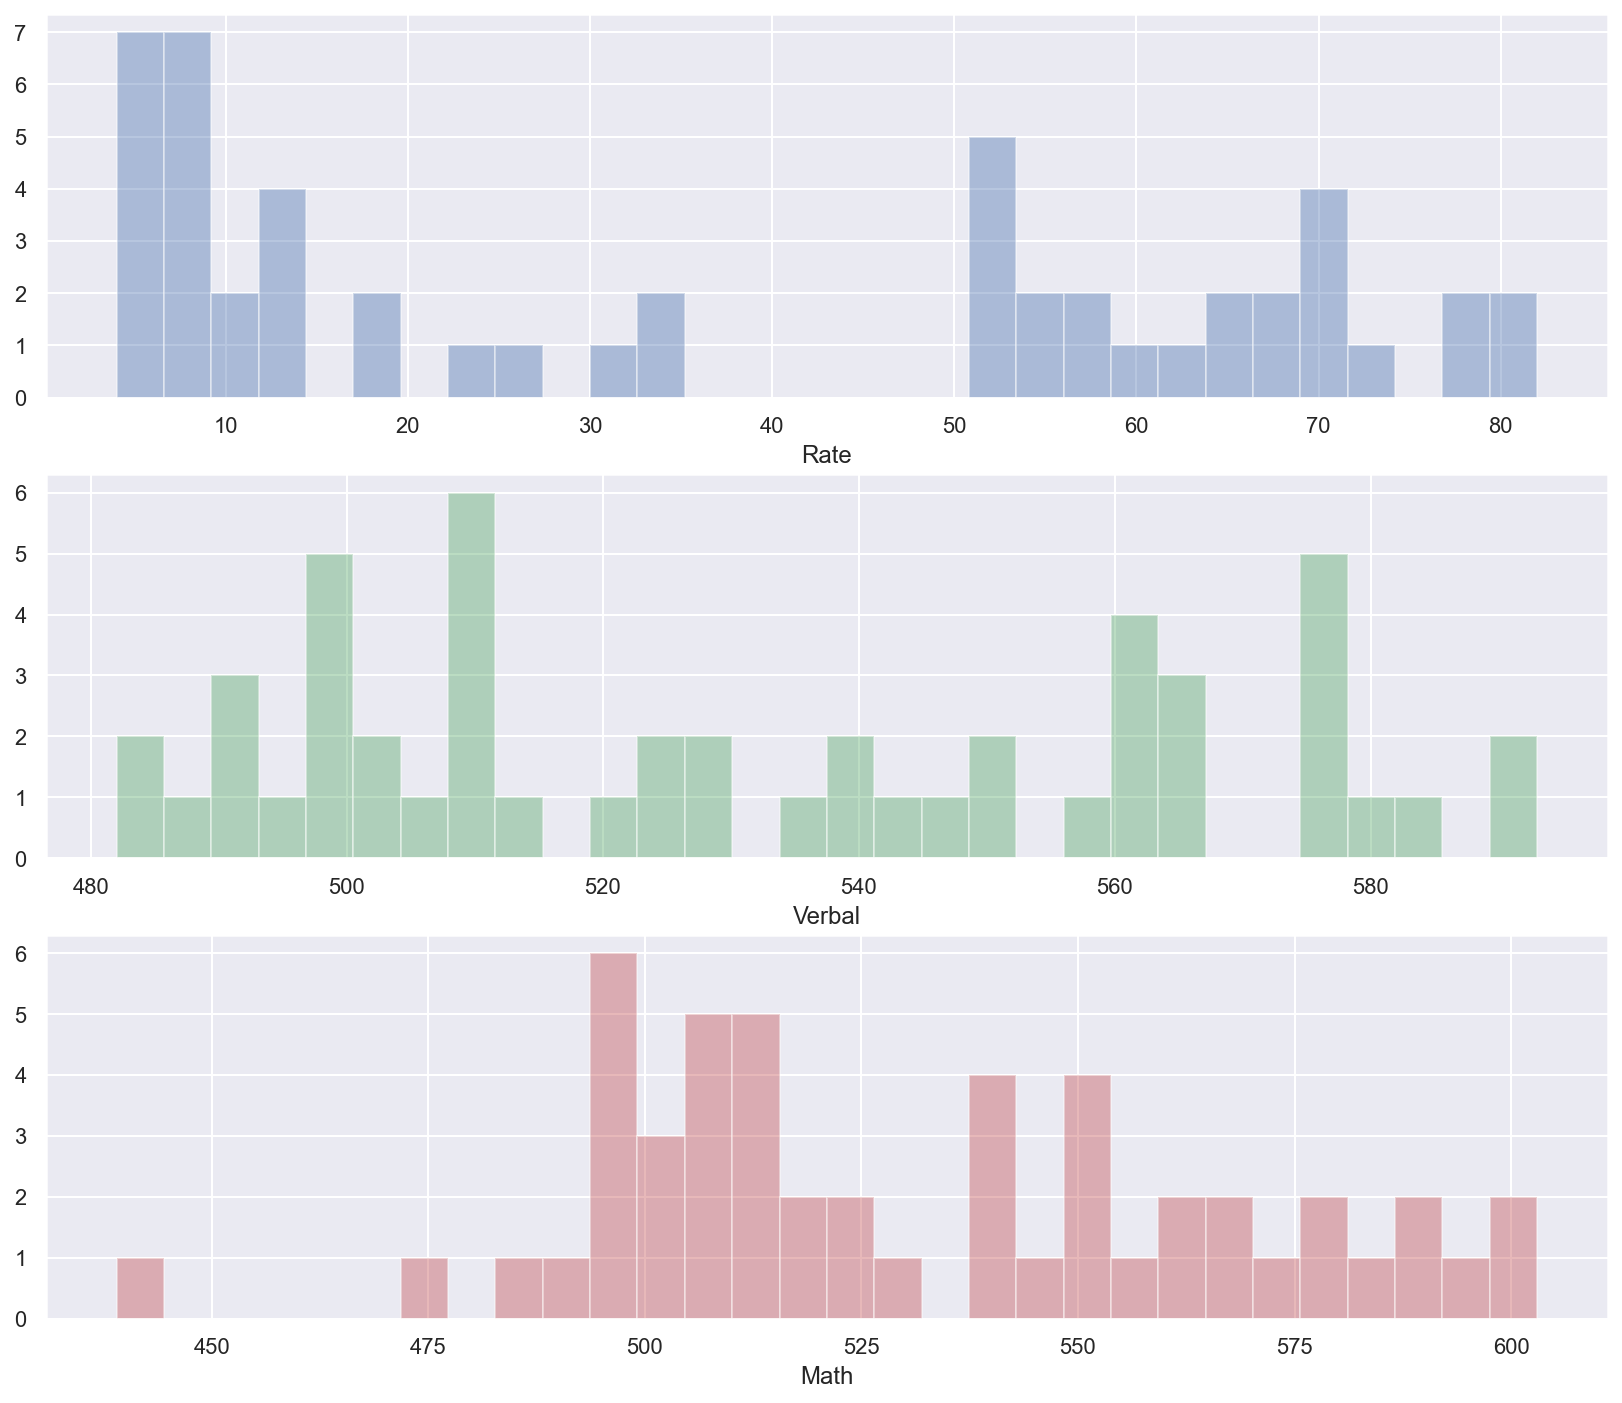

In [51]:
fig, ax = plt.subplots(3,1, figsize=(14,12))
sns.distplot(df_sat['Rate'], bins=30, kde=False, ax=ax[0])
sns.distplot(df_sat['Verbal'], bins=30, kde=False, color='g', ax=ax[1])
sns.distplot(df_sat['Math'], bins=30, kde=False, color='r', ax=ax[2])

observations:
- Rate and Verbal do not appear to follow a normal ditribution, however Math appears to have a somewhat positive distribution. 
- In all 3 cases the mean is higher than the median
- Rate: in some states, there is a high occurrence of low SAT takers and fewer states with high proportion of SAT takers
- Verbal: Results across the board were generally either poor or good
- Math: Most states faired well in Math. 

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

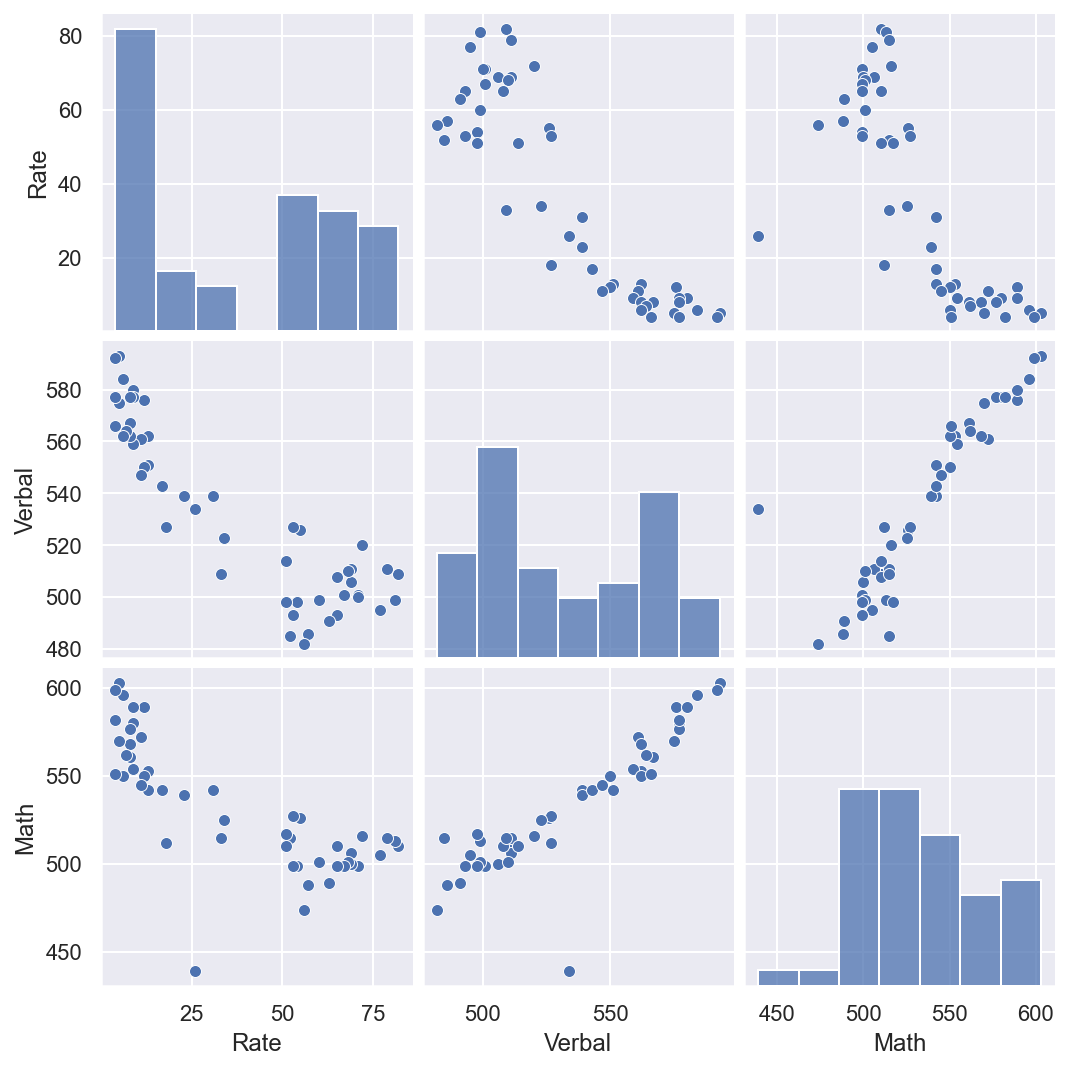

In [52]:
sns.pairplot(df_sat)

Observations:
    - A negative correlation between Participant numbers and Math, Rates and Verbal
    - Positive correlation between Math and Verbal. The states that scored well in math also scored well in Verbal.
    

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 0, 'Score')

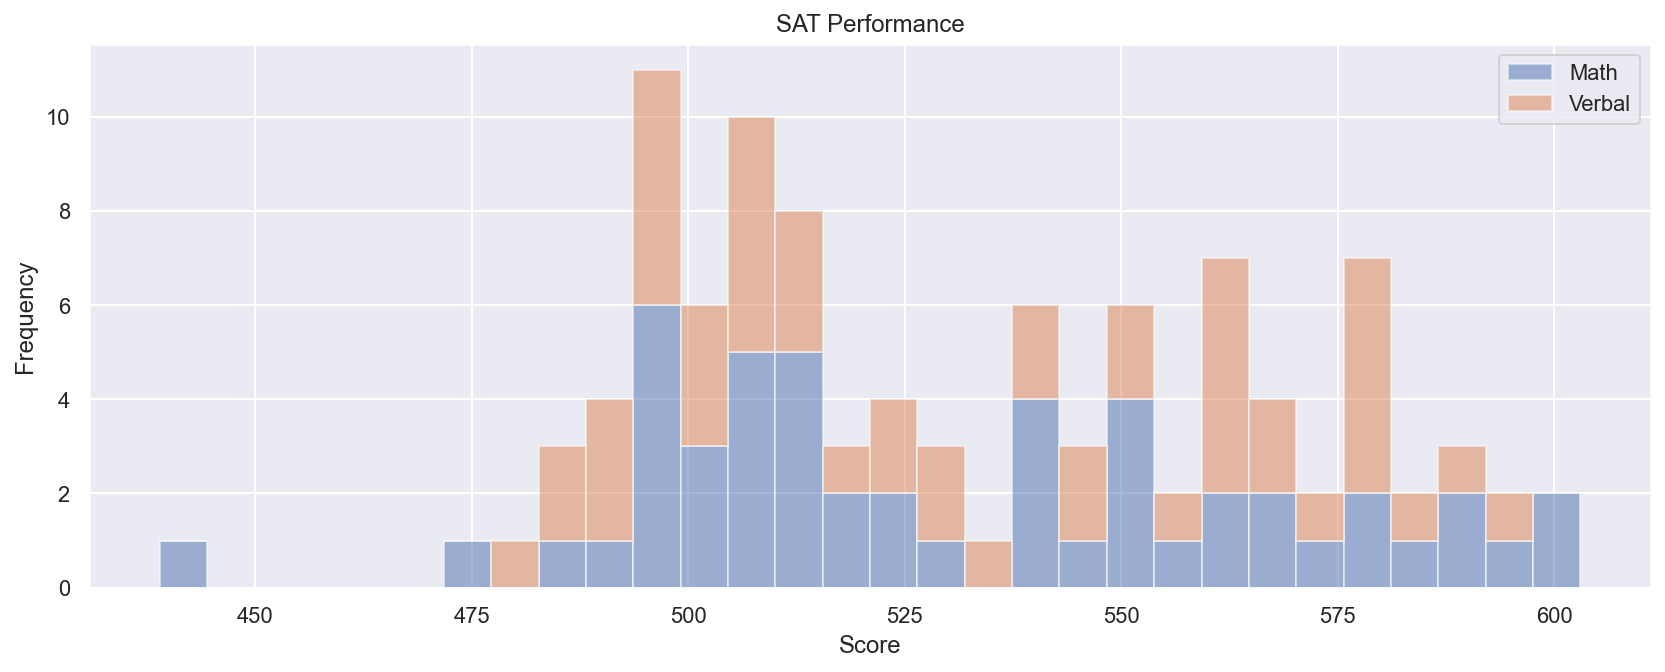

In [53]:
df_sat[['Math', 'Verbal']].plot.hist(bins=30, alpha=0.5, stacked=True, figsize=(14,5))
plt.title('SAT Performance')
plt.xlabel('Score')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

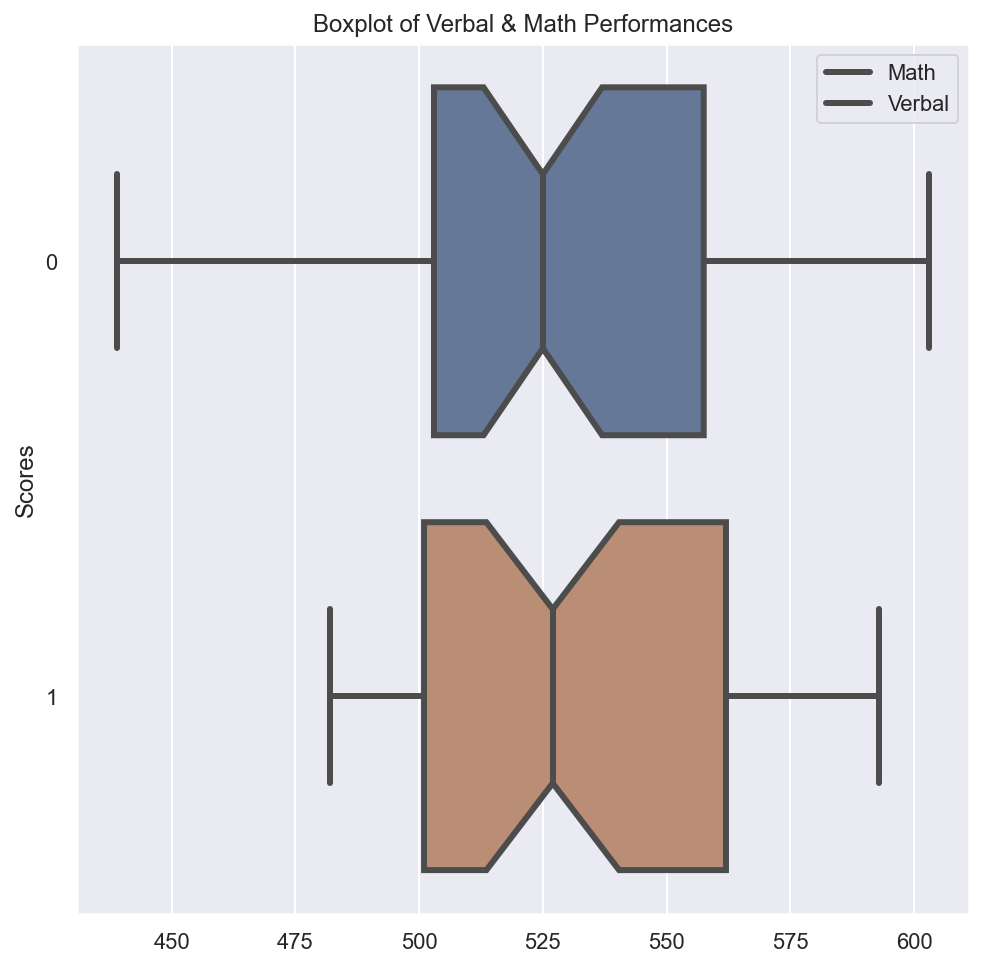

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.boxplot(data=[df_sat['Math'], df_sat['Verbal']], orient='h', fliersize=5,
            linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.legend(['Math', 'Verbal'])
axes = plt.gca()
#axes.set_xticks(['Math', 'Verbal'])
axes.set_ylabel('Scores')
axes.set_title('Boxplot of Verbal & Math Performances')
plt.show()

A boxplot does not show distribution as well as a scatterplot or a histogram but it is usful for indicating whether a distributiom is skewed and to highlight any potential observations of outliers within the dataset.
A boxplot provides information about the range as well as the minimum, maximum, median, outliers and the interquartile ranges. It also gives informatio on symmetry and skewness

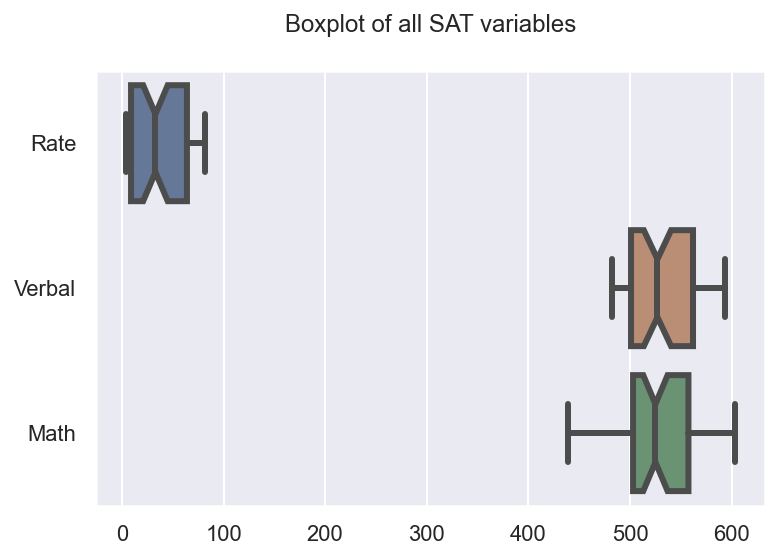

In [59]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.boxplot(data=df_sat[['Rate','Verbal','Math']], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('Boxplot of all SAT variables\n')
plt.show()

The Rate boxplot is on a different scale to the Math and Verbal boxplot and is difficult to make an acurate comparison. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In order to have the variables on the same chart in a meaningful way, the data needs to be standardize on the same scale. It can be done by applying the standardization method which factorsin the mean and standard deviation of the variables.

In [77]:
df_sat_std = (df_sat[['Rate','Verbal','Math']] - df_sat.mean()) / df_sat.std()

/var/folders/20/2yhwc5hd7bn9l8qzhbbtv_yr0000gn/T/ipykernel_2163/3429231208.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sat_std = (df_sat[['Rate','Verbal','Math']] - df_sat.mean()) / df_sat.std()


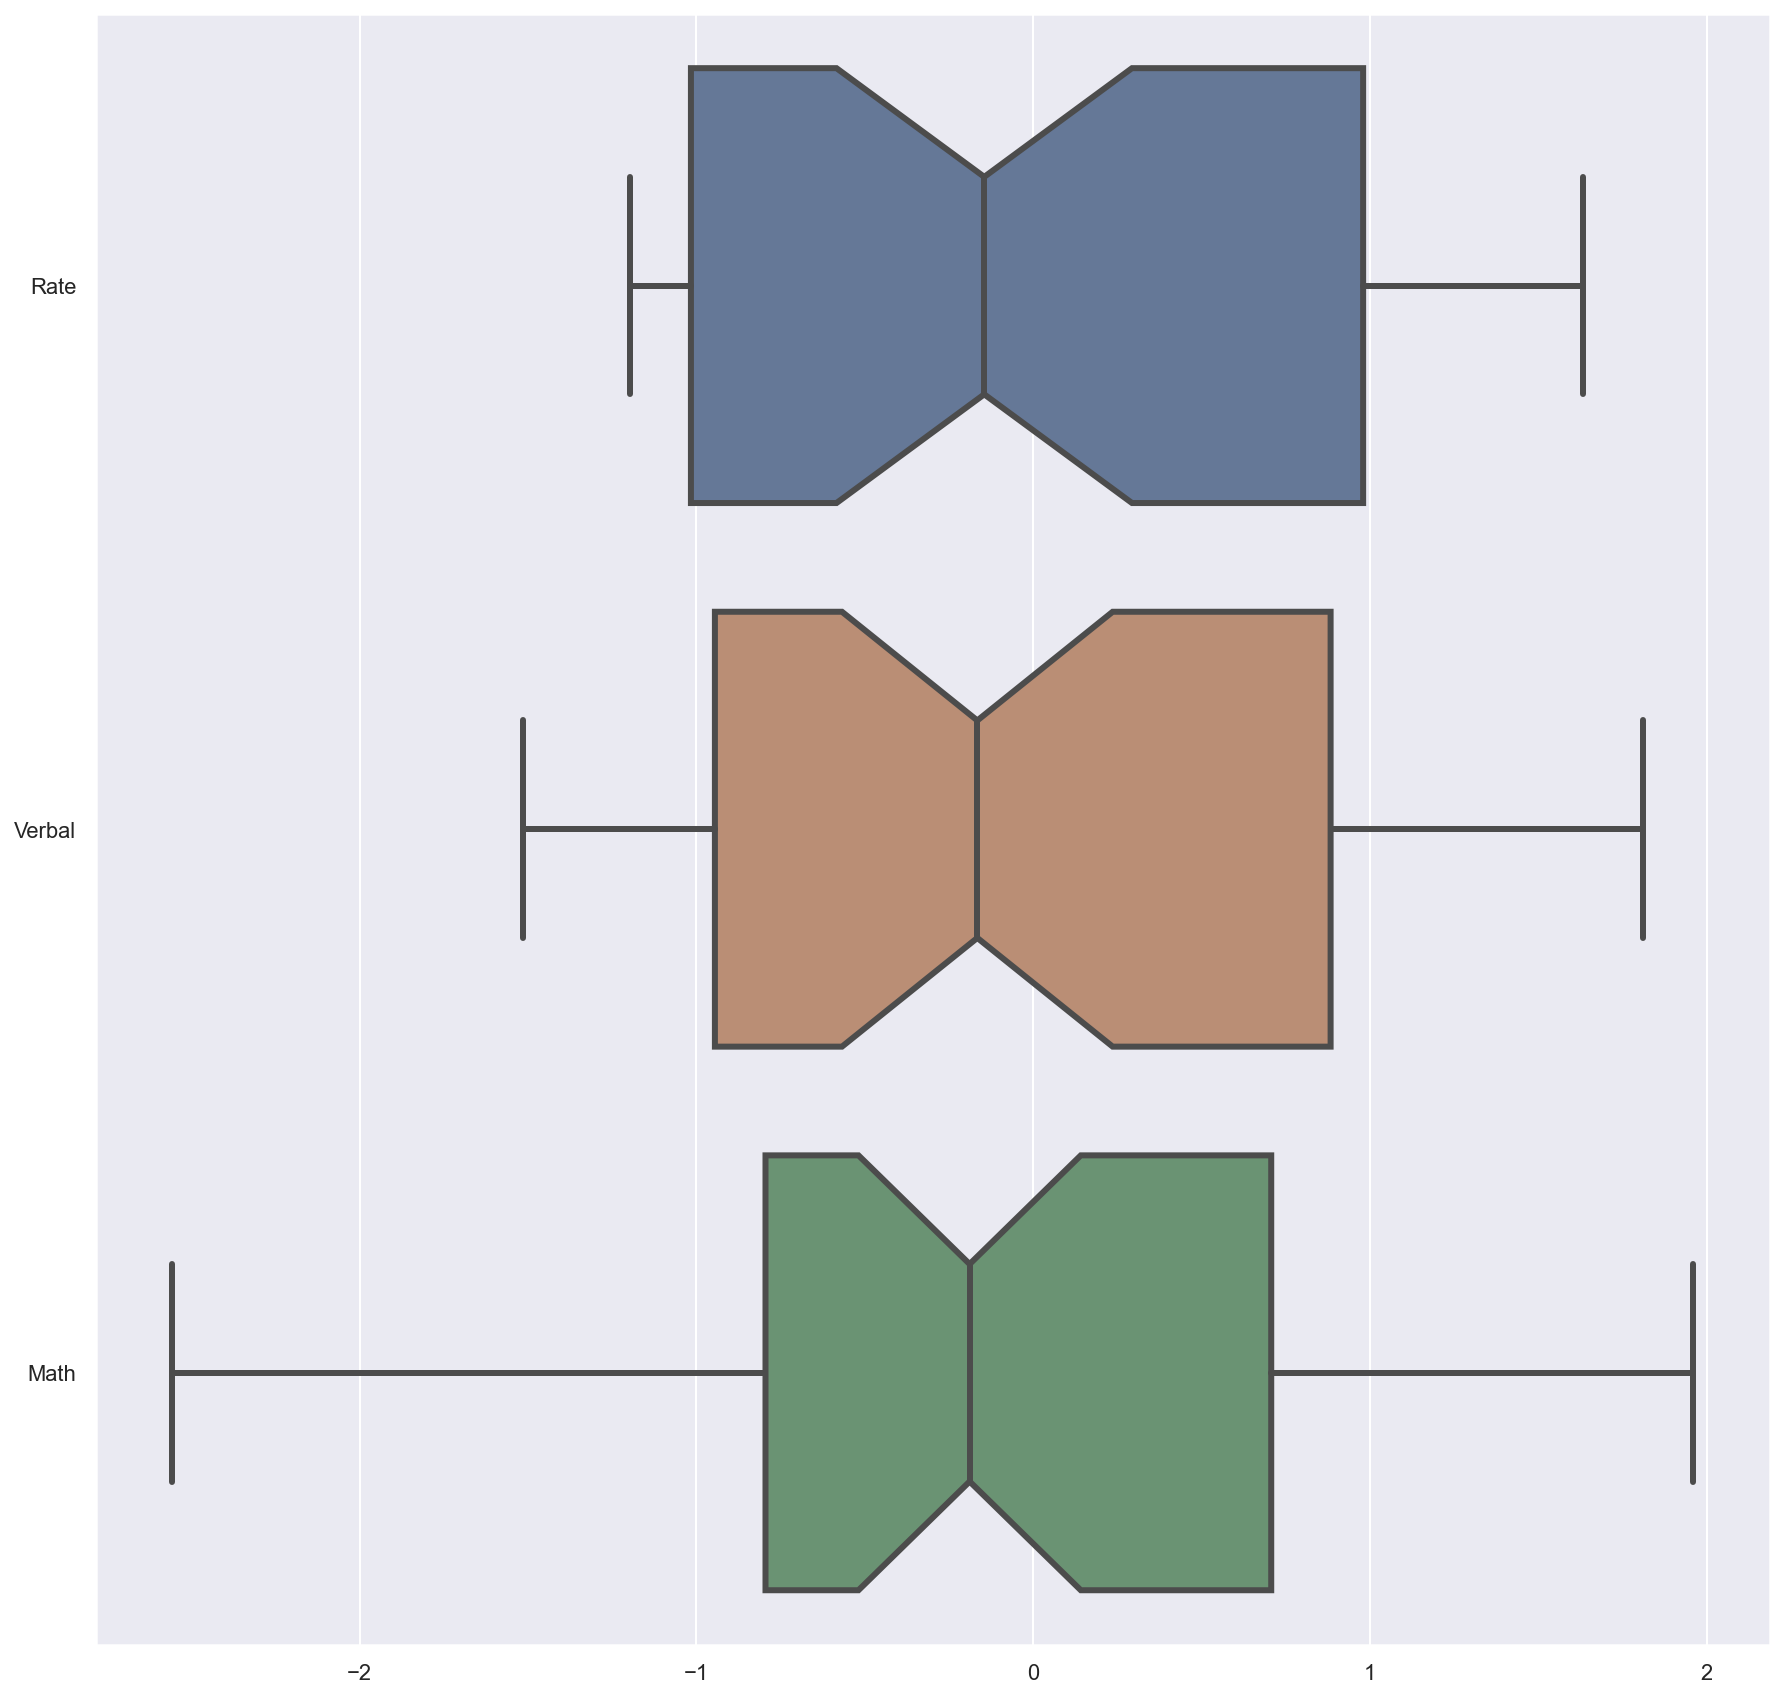

In [76]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=df_sat_std, orient='h', fliersize=5,
            linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [498]:
# Number of states above the mean
df_sat_abv_ave_verbal = df_sat[df_sat['Verbal']>df_sat['Verbal'].mean()].sort_values(by='Verbal', ascending=False)
len(df_sat_abv_ave_verbal)

24

In [499]:
# As a percentage
round(len(df_sat_abv_ave_verbal) / df_sat['State'].nunique()*100,2)

47.06

Over half of the states (53%) scored below average in Verbal

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [500]:
df_sat['Verbal'].median()

527.0

In [501]:
# Number of states above the median
df_sat_abv_median_verbal = df_sat[df_sat['Verbal']>df_sat['Verbal'].median()].sort_values(by='Verbal', ascending=False)
len(df_sat_abv_median_verbal)

24

In [502]:
# As a percentage
round(len(df_sat_abv_median_verbal) / df_sat['Verbal'].nunique()*100,2)

61.54

61.5% of states scored above the median. This is higher in comparison to the mean which was 47%, indicating that the median could be less sensitive to factors affecting scoring.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [503]:
df_sat['Diff_Verbal_Math'] = df_sat['Verbal'] - df_sat['Math']
df_sat.head()

,State,Rate,Verbal,Math,Diff_Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [504]:
# 1  Top 10 states with greatest gap between Verbal and Math

df_sat_verbal_greaterthanmath = df_sat.sort_values(by='Diff_Verbal_Math', ascending=False).head(10)
df_sat_verbal_greaterthanmath.head(10)

,State,Rate,Verbal,Math,Diff_Verbal_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [505]:
# 2  Inverse: states with the greatest gap Math and Verbal

df_sat_math_greaterthanverbal = df_sat.sort_values(by='Diff_Verbal_Math', ascending=True).head(10)
df_sat_math_greaterthanverbal.head(10)

,State,Rate,Verbal,Math,Diff_Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [506]:
df_sat_corr = df_sat.drop(columns=['State','Diff_Verbal_Math']).corr()
df_sat_corr

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<AxesSubplot:>

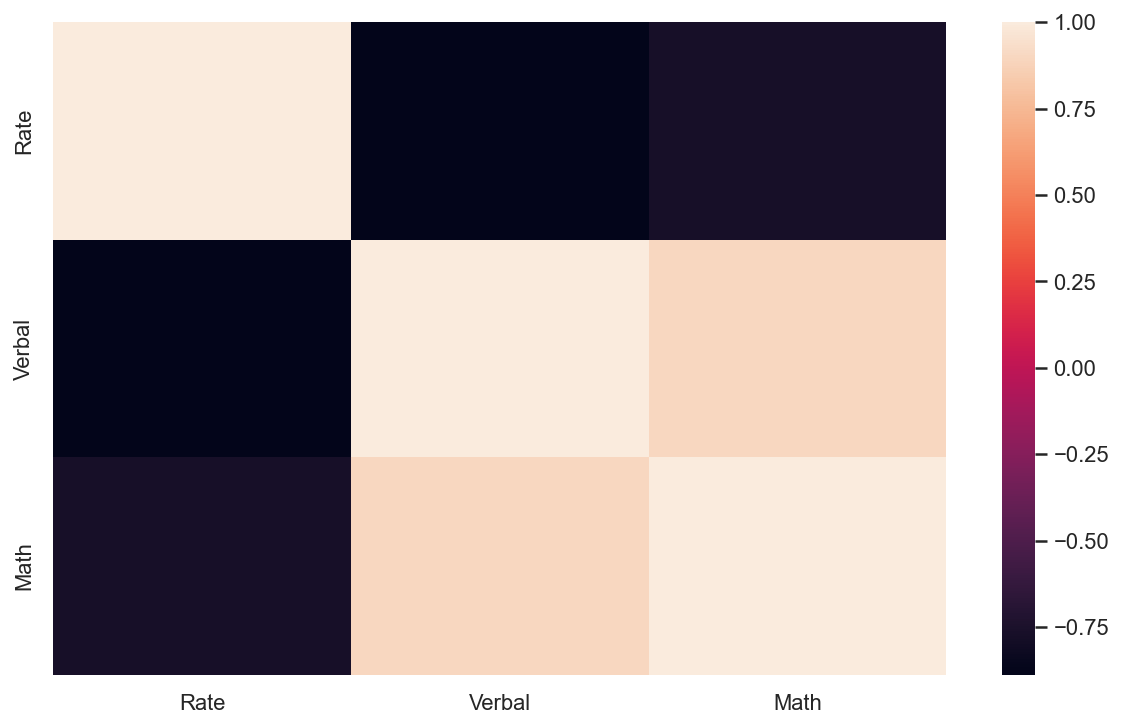

In [507]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sat_corr)

- Math and Verbal are strongly positively correlated. States that have performed well in Math are also likely to perform well in Verbal.
- Rate is strongly negatively correlated to and Verbal.
- This confirms the observations made using the pairplot

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [508]:
df_sat.drop(columns=['Diff_Verbal_Math']).describe(include='all')

,State,Rate,Verbal,Math
count,51,51.000000,51.000000,51.000000
unique,51,NaN,NaN,NaN
top,CT,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,37.000000,532.529412,531.843137
std,NaN,27.550681,33.360667,36.287393
min,NaN,4.000000,482.000000,439.000000
25%,NaN,9.000000,501.000000,503.000000
50%,NaN,33.000000,527.000000,525.000000
75%,NaN,64.000000,562.000000,557.500000


* count - Each variable had 51 rows of unique observations 
* mean - sum total of eah variable divided by the number of record of the variable
* std - standard deviation - A measure of the dispersion or movement of the individual reords relative to the mean 
* min - lowest value contained within each series 
* 25% - The first quartile and the middle value halfway bewteen the min and the median, which is the middle value of a series 
* 50% - The second quartile and the median as it is located half way between the 25% and 75% quartiles of a dataset. It is also the middle of the dataset.
* 75% - The third quartile. 75% of the data lie below this point 
* max - highest value contained within each series

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [509]:
# Covariance for the dataset
df_sat_cov = df_sat.drop(columns=['Diff_Verbal_Math']).cov()
df_sat_cov

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


#### Difference between Covariance matrix and correlation matrix
* Covariance is a measure of how related the variables are to each other and is measured on the variance of the variables.  
* Correlation matrix is dimensionless, regardless of what the units are in the variables, it always return the same in between -1 and 1.

#### Process to convert covariance into the correlation
* Divide Covariance by the multiplication of standard deviations of Random Variables (x & y))

#### Why correlation matrix preferred to the covariance matrix for examining relationships in data
* Correlation matrix is standardised with a range of -1 to 1  while Covariance Matrix range can be any measurement and so harder to be used for comparisons. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [510]:
df_drugs = pd.read_csv('drug-use-by-age.csv')
pd.set_option('display.max_columns', 28)
pd.set_option('display.max_rows', 17)
df_drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [511]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [512]:
df_drugs['n'].value_counts().sum()

17

In [513]:
df_drugs.isnull().sum()

age                    0
n                      0
alcohol-use            0
alcohol-frequency      0
marijuana-use          0
                      ..
stimulant-frequency    0
meth-use               0
meth-frequency         0
sedative-use           0
sedative-frequency     0
Length: 28, dtype: int64

In [514]:
df_drugs['age'].unique

<bound method Series.unique of 0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object>

In [515]:
df_drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

* Age datatype is object but should be int64. Methodology used to collect the data must have changed at some point during the survey as half the age data is is ranges. Wide age range surveyed (from 12 to 65+)
* All the columns should be integar or float as the data contained within them are mostly continous. There are some '-' in several columns  which will need to be replaced

In [516]:
# Replace the '-' with a string '0'
df_drugs = df_drugs.apply(lambda x: x.replace('-','0.0'))

# convert the data type of the columns to a float
df_drugs['meth-frequency'] = pd.to_numeric(df_drugs['meth-frequency'])
df_drugs['inhalant-frequency'] = pd.to_numeric(df_drugs['inhalant-frequency'])
df_drugs['oxycontin-frequency'] = pd.to_numeric(df_drugs['oxycontin-frequency'])
df_drugs['meth-frequency'] = pd.to_numeric(df_drugs['meth-frequency'])
df_drugs['heroin-frequency'] = pd.to_numeric(df_drugs['heroin-frequency'])
df_drugs['cocaine-frequency'] = pd.to_numeric(df_drugs['cocaine-frequency'])
df_drugs['crack-frequency'] = pd.to_numeric(df_drugs['crack-frequency'])
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [517]:
df_drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,68.970588,3.394118,8.411765,1.388235,5.794118,6.270588,14.705882,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,70.153285,2.792506,15.000245,0.927283,4.937291,3.166379,6.935098,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.000000,0.600000,7.000000,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,35.500000,0.600000,3.000000,0.600000,3.000000,3.900000,12.000000,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,50.000000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,66.500000,5.200000,4.000000,2.000000,5.500000,9.000000,15.000000,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


<AxesSubplot:>

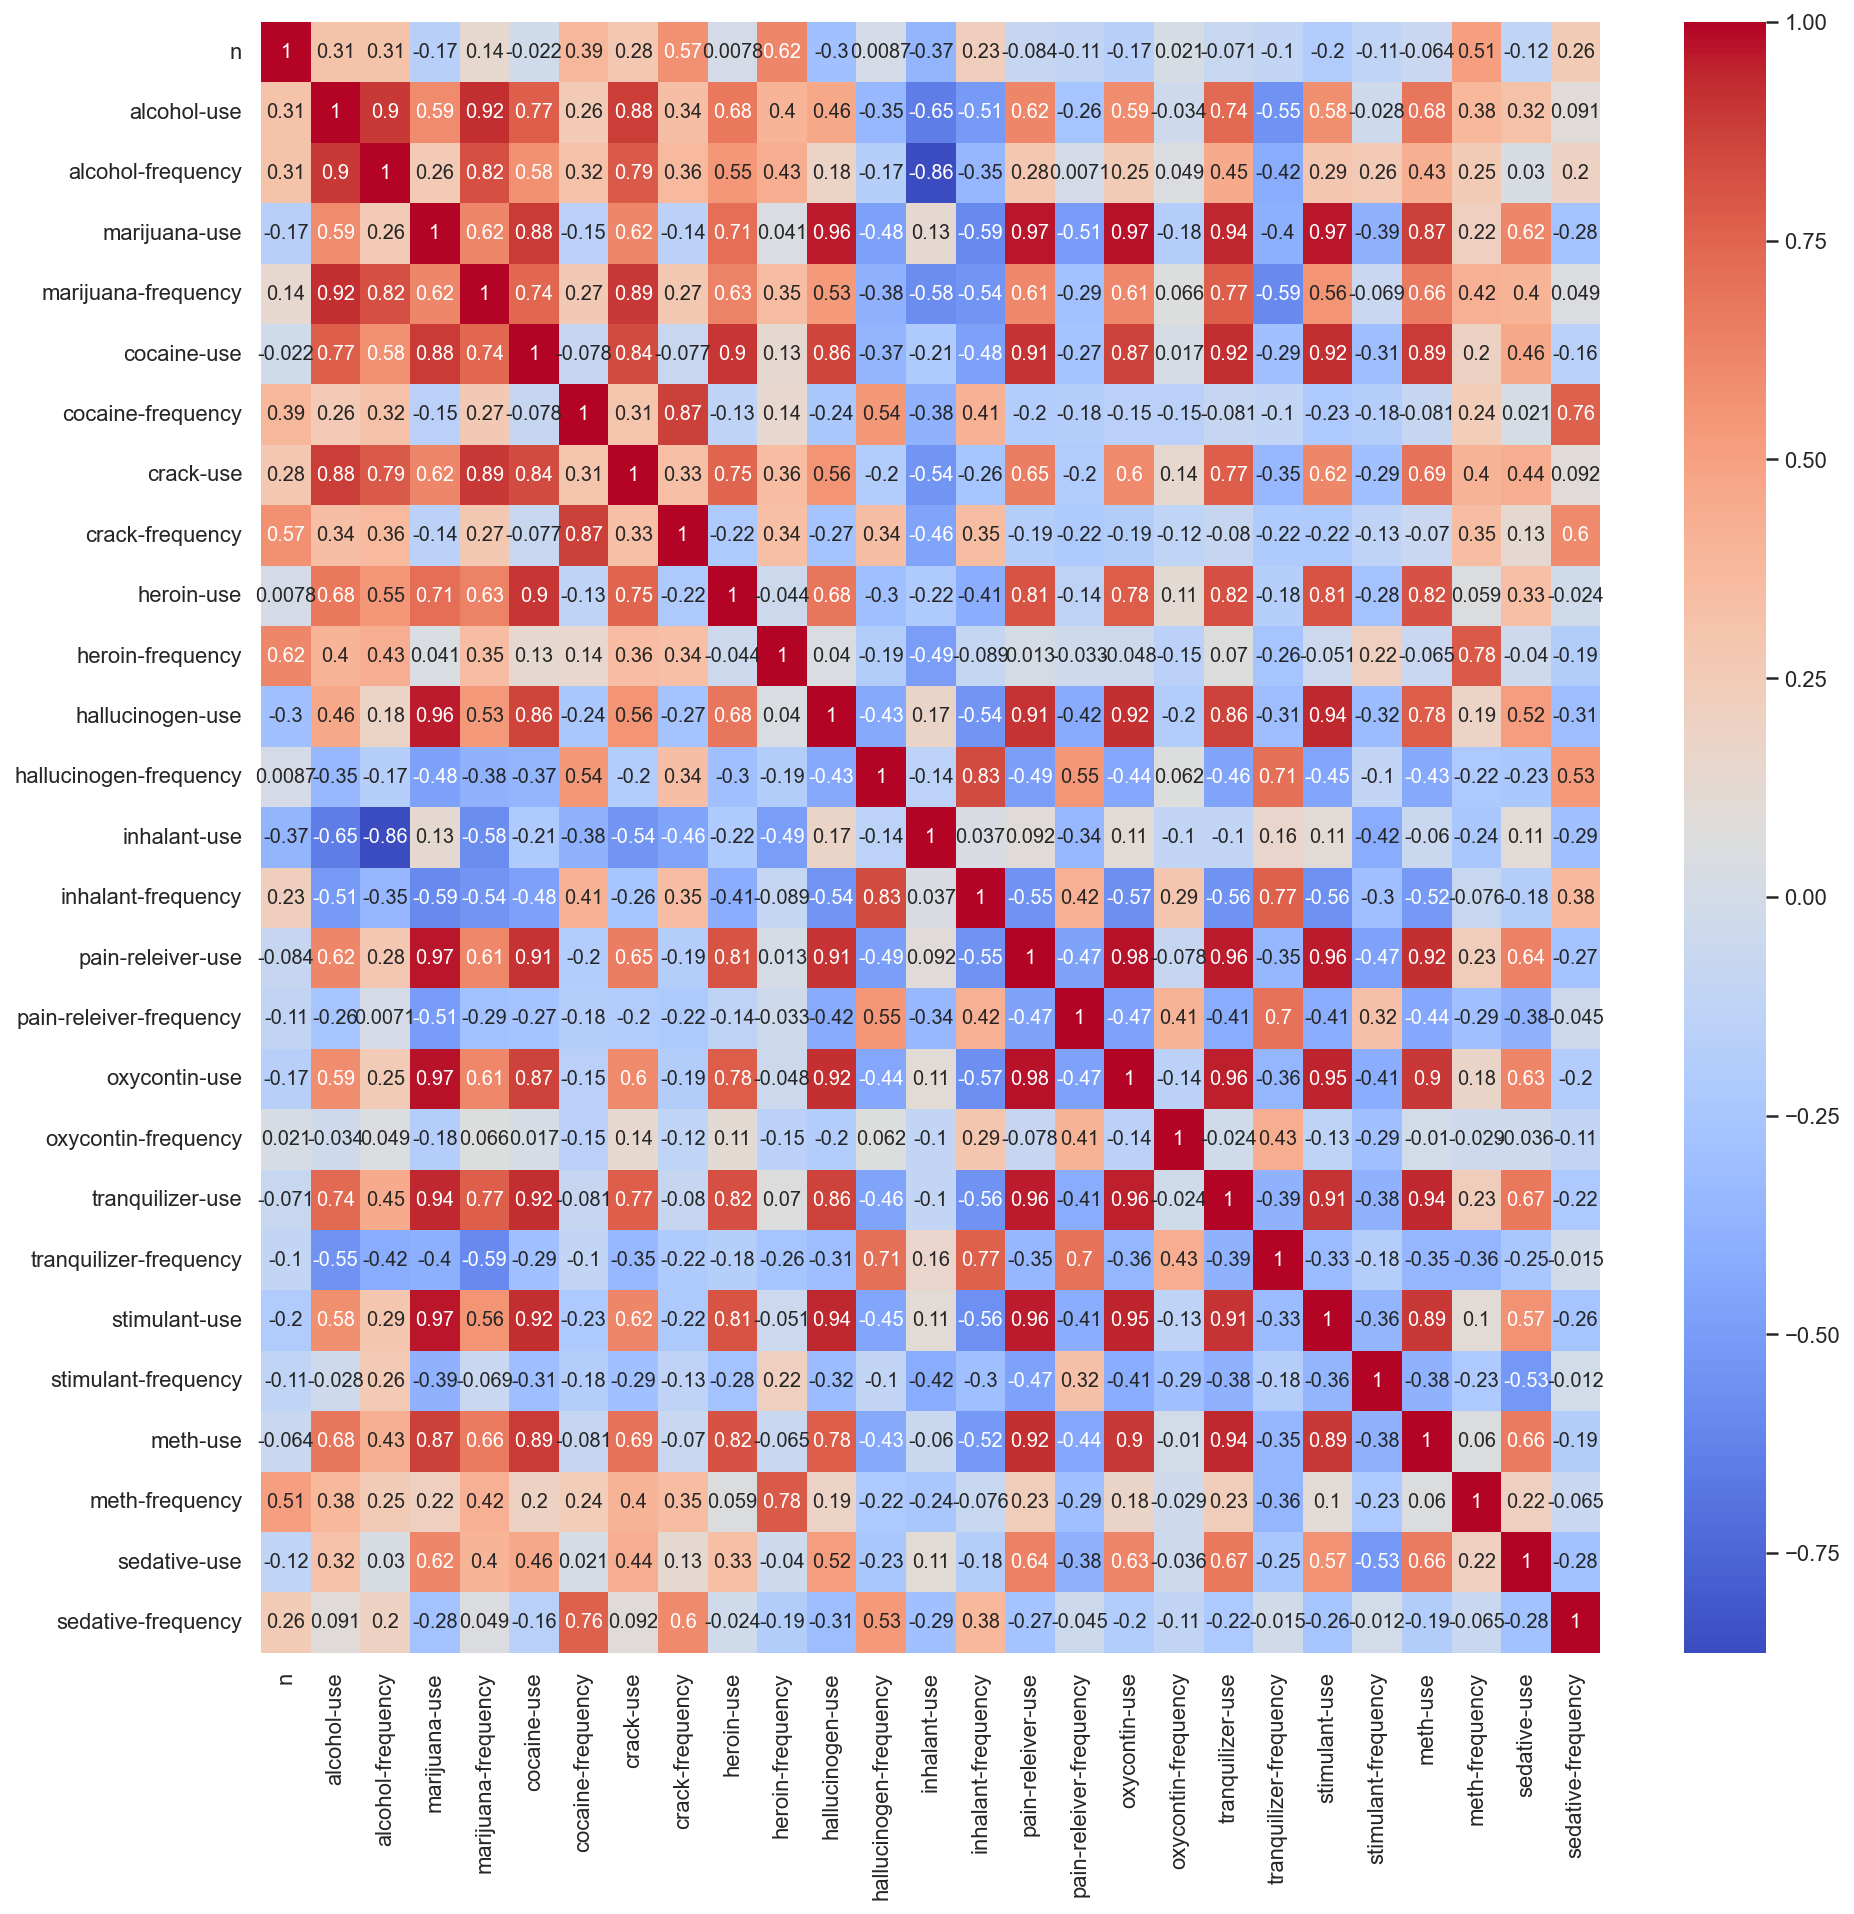

In [518]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_drugs.corr(), cmap='coolwarm', annot=True)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Question: Does substance use and frequency increase with age? 

Deliverables: Spearman's rank correlation of age correlated with usage.

In [522]:
df_drugs.filter(regex = 'use|freq').corr(method='spearman')

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
alcohol-use,1.000000,0.879048,0.529736,0.795855,0.784750,0.333209,0.829994,0.489848,0.757266,0.382587,0.438037,-0.411036,-0.612646,-0.448764,0.612646,0.222939,0.533255,0.353591,0.673419,-0.030922,0.577914,0.393590,0.709185,0.355651,0.251228,-0.094711
alcohol-frequency,0.879048,1.000000,0.208460,0.706857,0.470803,0.296839,0.640306,0.480190,0.417035,0.510144,0.081621,-0.443489,-0.867920,-0.450220,0.257330,0.334689,0.187253,0.187326,0.360391,-0.126032,0.205996,0.610356,0.403163,0.270459,0.037418,0.011040
marijuana-use,0.529736,0.208460,1.000000,0.644758,0.898591,0.183121,0.672246,0.246004,0.760567,0.200980,0.979767,-0.294790,0.136196,-0.467124,0.968099,-0.375901,0.962470,0.044172,0.926381,-0.025959,0.960147,-0.071518,0.854706,0.315532,0.610925,-0.491705
marijuana-frequency,0.795855,0.706857,0.644758,1.000000,0.786578,0.492371,0.867061,0.391033,0.725328,0.455562,0.566688,-0.536990,-0.538373,-0.504733,0.667981,0.082174,0.626290,0.289126,0.757087,-0.116764,0.570425,0.328130,0.695994,0.434580,0.415596,-0.242216
cocaine-use,0.784750,0.470803,0.898591,0.786578,1.000000,0.304464,0.870990,0.339914,0.903908,0.224955,0.864701,-0.308554,-0.156308,-0.418715,0.934155,-0.101131,0.879013,0.337847,0.922463,0.052078,0.917592,0.019790,0.902623,0.332513,0.534143,-0.396424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stimulant-frequency,0.393590,0.610356,-0.071518,0.328130,0.019790,0.489030,0.283756,0.241337,-0.037885,0.356357,-0.220238,-0.515850,-0.575316,-0.244382,-0.095063,0.058237,-0.121982,-0.262349,-0.041359,-0.317787,-0.126467,1.000000,-0.012446,0.167389,-0.123450,0.118739
meth-use,0.709185,0.403163,0.854706,0.695994,0.902623,0.197487,0.725415,0.383619,0.853162,0.153377,0.815625,-0.395855,-0.048299,-0.424455,0.887954,-0.219225,0.872682,0.250782,0.913961,0.063007,0.877508,-0.012446,1.000000,0.265187,0.615980,-0.362910
meth-frequency,0.355651,0.270459,0.315532,0.434580,0.332513,0.588074,0.409448,0.346273,0.200551,0.581953,0.294841,-0.322299,-0.159803,-0.056009,0.368162,-0.369736,0.345254,0.039336,0.317763,-0.237157,0.242629,0.167389,0.265187,1.000000,0.322499,-0.259852
sedative-use,0.251228,0.037418,0.610925,0.415596,0.534143,0.198065,0.486870,0.516699,0.457268,0.015178,0.567002,-0.162051,0.091815,-0.010258,0.543922,-0.462487,0.586885,0.012664,0.582547,-0.218808,0.561307,-0.123450,0.615980,0.322499,1.000000,-0.513843


In [539]:
use = df_drugs.filter(regex = 'use')
freq = df_drugs.filter(regex = 'freq')
l= []
d = {'name':[],'pvalue':[],'correlation':[]}
for col in use.columns:
    if len(col.split('-')[:-1]) ==1:
        result = scipy.stats.spearmanr(use[col.split('-')[0]+'-use'],freq[col.split('-')[0]+'-frequency'])
        d['name'].append(col.split('-')[0])
        d['pvalue'].append(result.pvalue)
        d['correlation'].append(result.correlation)
        
spearmans = pd.DataFrame(d)
spearmans.set_index('name').sort_values('pvalue')

,pvalue,correlation
name,,
alcohol,0.000003,0.879048
marijuana,0.005201,0.644758
sedative,0.034864,-0.513843
crack,0.046149,0.489435
cocaine,0.234759,0.304464
meth,0.303631,0.265187
hallucinogen,0.389277,-0.223152
inhalant,0.438008,0.201508
stimulant,0.628621,-0.126467


**Report**



...

Findings: Alcohol and cannabis had very strong correlations (0.879048 and 0.644758, respectively) with an increase in age and usage. This could be attributed to the increasing availability of disposable income with an increase in age to purchase the substances. 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [526]:
# Rate variable
print(sorted(df_sat['Rate']))

[4, 4, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9, 9, 11, 11, 12, 12, 13, 13, 17, 18, 23, 26, 31, 33, 34, 51, 51, 52, 53, 53, 54, 55, 56, 57, 60, 63, 65, 65, 67, 68, 69, 69, 71, 71, 72, 77, 79, 81, 82]


/Users/christineezeogu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rate'>

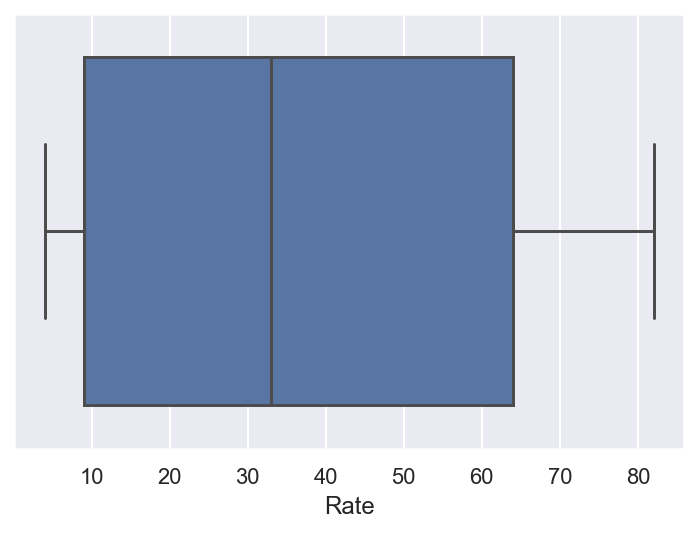

In [29]:
# Boxplot of SAT
sns.boxplot(df_sat['Rate'])

In [30]:
df_sat['Verbal'].mean()

532.5294117647059

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


1. Spearman Correlation measures the direction and strength of the monotonic relationship  between two ranked variables. Pearson Correlation measures the linear relationship between two variables.

2. Spearman rank correlation: 
* Get the Rank of each value for 'x' and 'y' dataset 
* Get the 'Rank' Covariance ('x' and 'y' dataset)
* Divide the 'Rank Covariance' by the multiplication of the 'rank' standard deviations of 'x' and 'y'

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

Percentile can be sorted and ranked in ascending or descending order. Spearman rank correlation is based on a ranking order of the data

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.